# 泰坦尼克号数据集分析

## 问题：有哪些因素会让船上的人生还率更高？

### 一、数据基本信息

In [63]:
#引入需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#读取数据集
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [128]:
#数据集信息
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_group      891 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB


Age,Cabin,Embarked存在缺失值

In [67]:
titanic_df[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch',  'Fare', 'Cabin', 'Embarked']].describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,C23 C25 C27,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


### 二、一维数据分析

**Survived**

In [69]:
#生还人数
total_survived_num = titanic_df['Survived'].sum()
total_survived_num

342

In [70]:
#未生还人数
total_no_survived_num = 891 - total_survived_num
total_no_survived_num

549

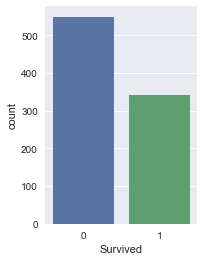

In [129]:
plt.subplot(121)
sns.countplot(x = 'Survived', data = titanic_df)
plt.show()

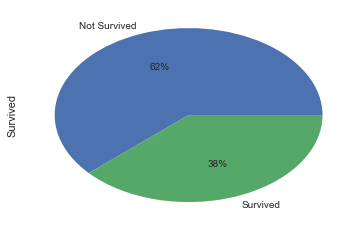

In [178]:
titanic_df.groupby('Survived')['Survived'].count().plot(kind = "pie", autopct='%1.0f%%', labels=['Not Survived','Survived'])

**Sex**

In [155]:
male_sum = titanic_df['Sex'][titanic_df['Sex'] == 'male'].count()
male_sum

577

In [156]:
female_sum = titanic_df['Sex'][titanic_df['Sex'] == 'female'].count()
female_sum

314

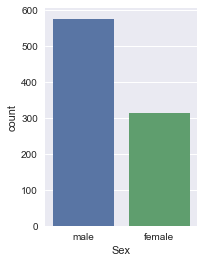

In [160]:
plt.subplot(121)
sns.countplot(x='Sex', data=titanic_df)
plt.show()

In [132]:
#性别
titanic_df[['Sex','Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,233
male,109


In [86]:
titanic_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


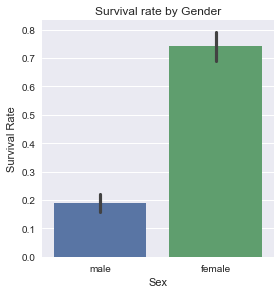

In [117]:
sns.factorplot(x="Sex", y="Survived",kind='bar', data=titanic_df)
sns.plt.title('Survival rate by Gender')
plt.ylabel("Survival Rate")
plt.show()

女性生还率远远大于男性

**Age**

年龄有缺失值，先处理缺失值

In [164]:
titanic_age_median = titanic_df['Age'].median()
titanic_df.Age = titanic_df.Age.fillna(titanic_age_median)
bins = [0, 12, 18, 45, 100]
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)
age_sum = titanic_df.groupby('Age_group')['Survived'].count()
age_sum

Age_group
(0, 12]       69
(12, 18]      70
(18, 45]     649
(45, 100]    103
Name: Survived, dtype: int64

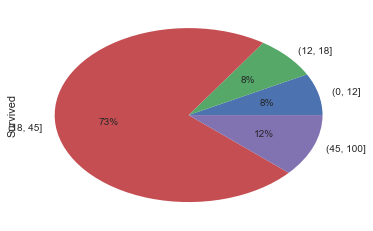

In [167]:
age_sum.plot(kind = "pie", autopct='%1.0f%%')
plt.show()

In [161]:
age_survived_sum = titanic_df.groupby('Age_group')['Survived'].sum()
age_survived_sum

Age_group
(0, 12]       40
(12, 18]      30
(18, 45]     234
(45, 100]     38
Name: Survived, dtype: int64

In [139]:
by_age = titanic_df.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.579710
(12, 18]     0.428571
(18, 45]     0.360555
(45, 100]    0.368932
Name: Survived, dtype: float64

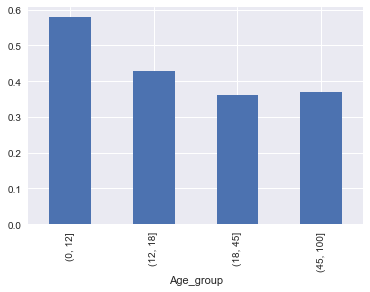

In [140]:
by_age.plot(kind = "bar")
plt.show()

儿童和青少年的生还率要高于中年人和老年人

**Pclass**

In [174]:
Pclass = titanic_df.groupby('Pclass')['Pclass'].count()
Pclass

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

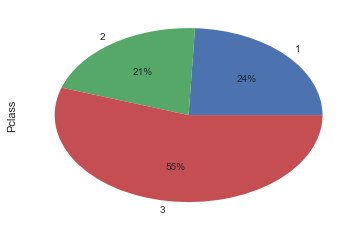

In [176]:
Pclass.plot(kind = "pie", autopct='%1.0f%%')
plt.show()

In [141]:
#船舱等级
by_Pclass = titanic_df.groupby('Pclass')[['Survived']].mean()
by_Pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


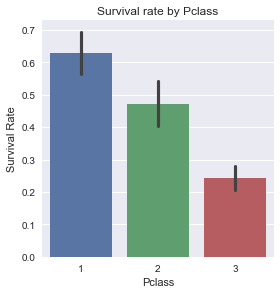

In [94]:
sns.factorplot(x="Pclass", y="Survived",kind='bar', data=titanic_df)
sns.plt.title('Survival rate by Pclass')
plt.ylabel("Survival Rate")
plt.show()

Pclass等级越高，生还率越高，Pclass为1的生还率大于Pclass为2的生还率大于Pclass为3的生还率

### 三、二维数据分析

**Pclass&Age**

In [108]:
titanic_df.groupby(['Pclass'])[['Age']].mean()

,Age
Pclass,
1,36.812130
2,29.765380
3,25.932627


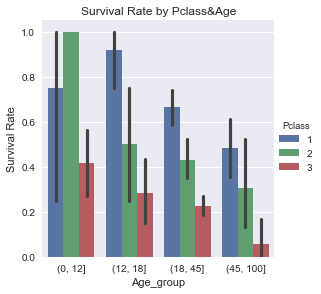

In [147]:
sns.factorplot(x="Age_group", y="Survived", hue = 'Pclass',kind='bar', data=titanic_df)
sns.plt.title('Survival Rate by Pclass&Age')
plt.ylabel("Survival Rate")
plt.show()

船舱等级越高，生还率越高，相同的舱房等级，儿童和青少年生还率要高于中年人和老年人

Sex&Age

In [112]:
titanic_df.groupby(['Sex'])[['Age']].mean()

,Age
Sex,
female,27.929936
male,30.140676


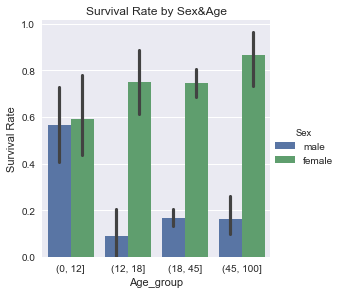

In [148]:
sns.factorplot(x="Age_group", y="Survived", hue = 'Sex',kind='bar', data=titanic_df)
sns.plt.title('Survival Rate by Sex&Age')
plt.ylabel("Survival Rate")
plt.show()

不管哪个年龄段，女性生还率都要高于男性，不管是女性还是男性，儿童生还率都很高

**Sex&Pclass**

In [118]:
titanic_df.groupby(['Sex', 'Pclass'])[['Survived']].mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

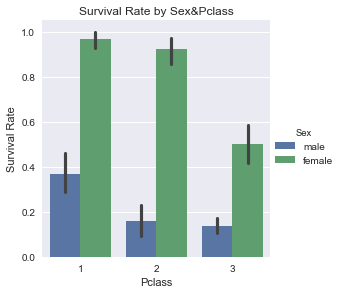

In [149]:
sns.factorplot(x="Pclass", y="Survived", hue = 'Sex',kind='bar', data=titanic_df)
sns.plt.title('Survival Rate by Sex&Pclass')
plt.ylabel("Survival Rate")
plt.show()

不管哪个船舱等级女性生还率都远高于男性，不管是男性还是女性，船舱等级越高，生还率越高

### 四、结论

舱房等级越高生还率越高，女性生还率高于男性，儿童生还率高于其他年龄段。但是此结论有一定的局限性，实际上泰坦尼克号上有2224名乘客，而此数据集只有891名乘客的数据，另外也并不知道样本是如何选取的，样本量也不大，如果不是随机抽样，那么这个结论就不可靠了，而且可能还有其他数据集中没有的变量影响着生还率，比如乘客的身高、体重等等。